# Task5 :  Wine quality prediction

  

**Background of Task 5: Wine Quality Prediction**

- Dataset includes chemical attributes of wine (acidity, sugar, alcohol, etc.).
- Aim is to build a predictive model for wine quality.
- Relevance in viticulture and oenology for quality assessment.

**Benefits of Task 5:**

- Enhances overall wine quality.
- Supports precision viticulture for optimized grape cultivation.
- Facilitates process optimization in winemaking.
- Improves market competitiveness by consistently producing high-quality wines.
- Contributes to cost reduction through targeted resource allocation.
- Promotes data-driven decision-making in winemaking practices.

# Import necessary libraries


In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler,LabelEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix ,precision_score ,recall_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier


# 1. Data Gathering:


In [2]:
data = pd.read_csv("./Dataset/winequality-red.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
## Check the size
data.shape

(1599, 12)

In [4]:
## Basic info on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
## Check basic statistic
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
## Check basic statistic
data.describe(include = "all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 2. Data Cleaning 
    In the Data Cleaning  step, the dataset undergoes essential operations:

1. **Removing Duplicates:**
   Identical entries are eliminated, ensuring each data point is unique.

2. **Removing NaN Rows and Columns:**
   Rows and columns with missing values are deleted, ensuring data integrity.


In [7]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates


240

In [8]:
## Check for nan values

data.isna().sum() 


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [12]:
data.shape

(1599, 12)

# 3. Data Visualization and Exploration
    In this step, we'll analyze the dataset using histograms and bar charts to understand numerical and categorical distributions.

## 1. Histogram for Fixed Acidity:

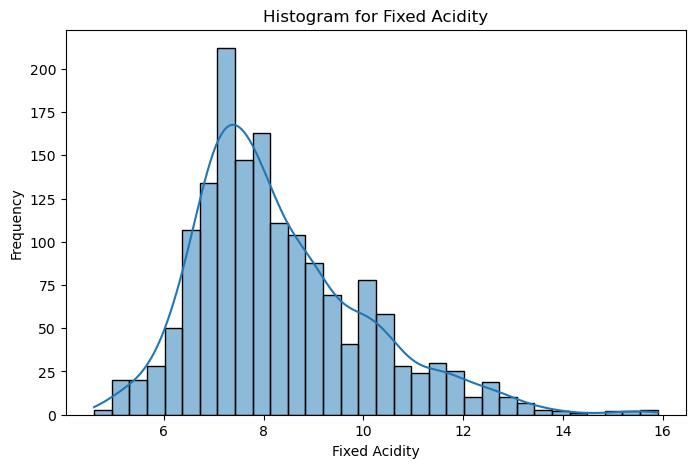

In [13]:
# Plotting histogram for 'Fixed Acidity'
plt.figure(figsize=(8, 5))
sns.histplot(data['fixed acidity'], kde=True)
plt.title('Histogram for Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()


## 2. Histogram for Volatile Acidity:

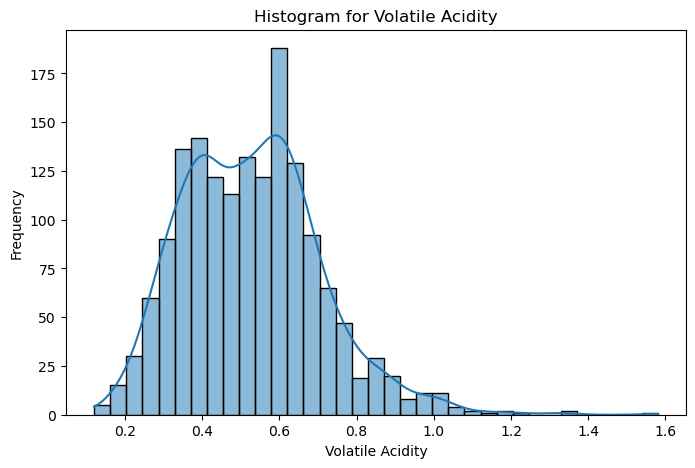

In [14]:
# Plotting histogram for 'Volatile Acidity'
plt.figure(figsize=(8, 5))
sns.histplot(data['volatile acidity'], kde=True)
plt.title('Histogram for Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()


## 3.Boxplot for Citric Acid by Quality:

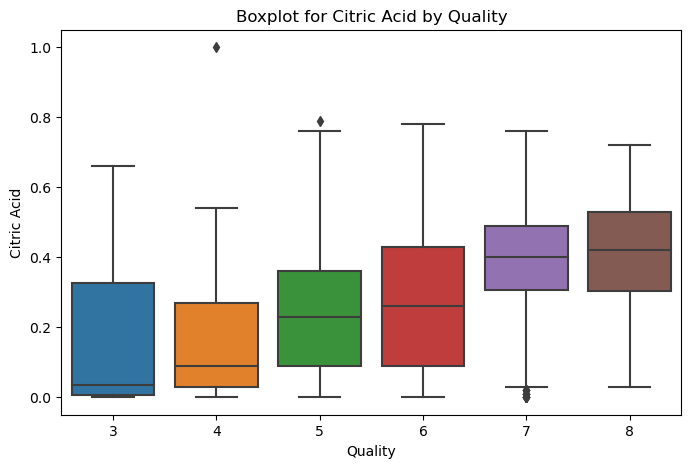

In [15]:
# Boxplot for 'Citric Acid' by 'Quality'
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='citric acid', data=data)
plt.title('Boxplot for Citric Acid by Quality')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.show()


## 4. Scatter Plot for Residual Sugar vs Alcohol:

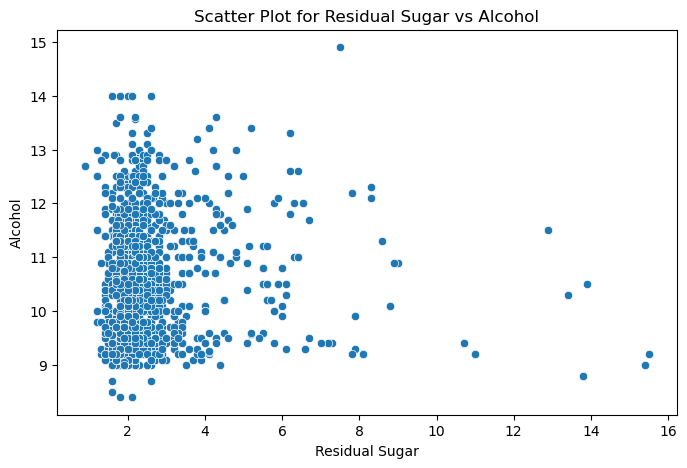

In [16]:
# Scatter plot for 'Residual Sugar' vs 'Alcohol'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='residual sugar', y='alcohol', data=data)
plt.title('Scatter Plot for Residual Sugar vs Alcohol')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')
plt.show()


## 5. Countplot for Quality:

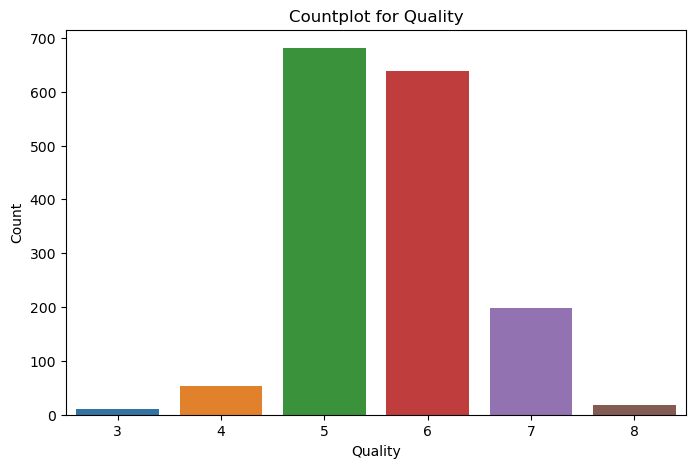

In [17]:
# Countplot for 'Quality'
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data)
plt.title('Countplot for Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


## 6. Pairplot for Select Features:

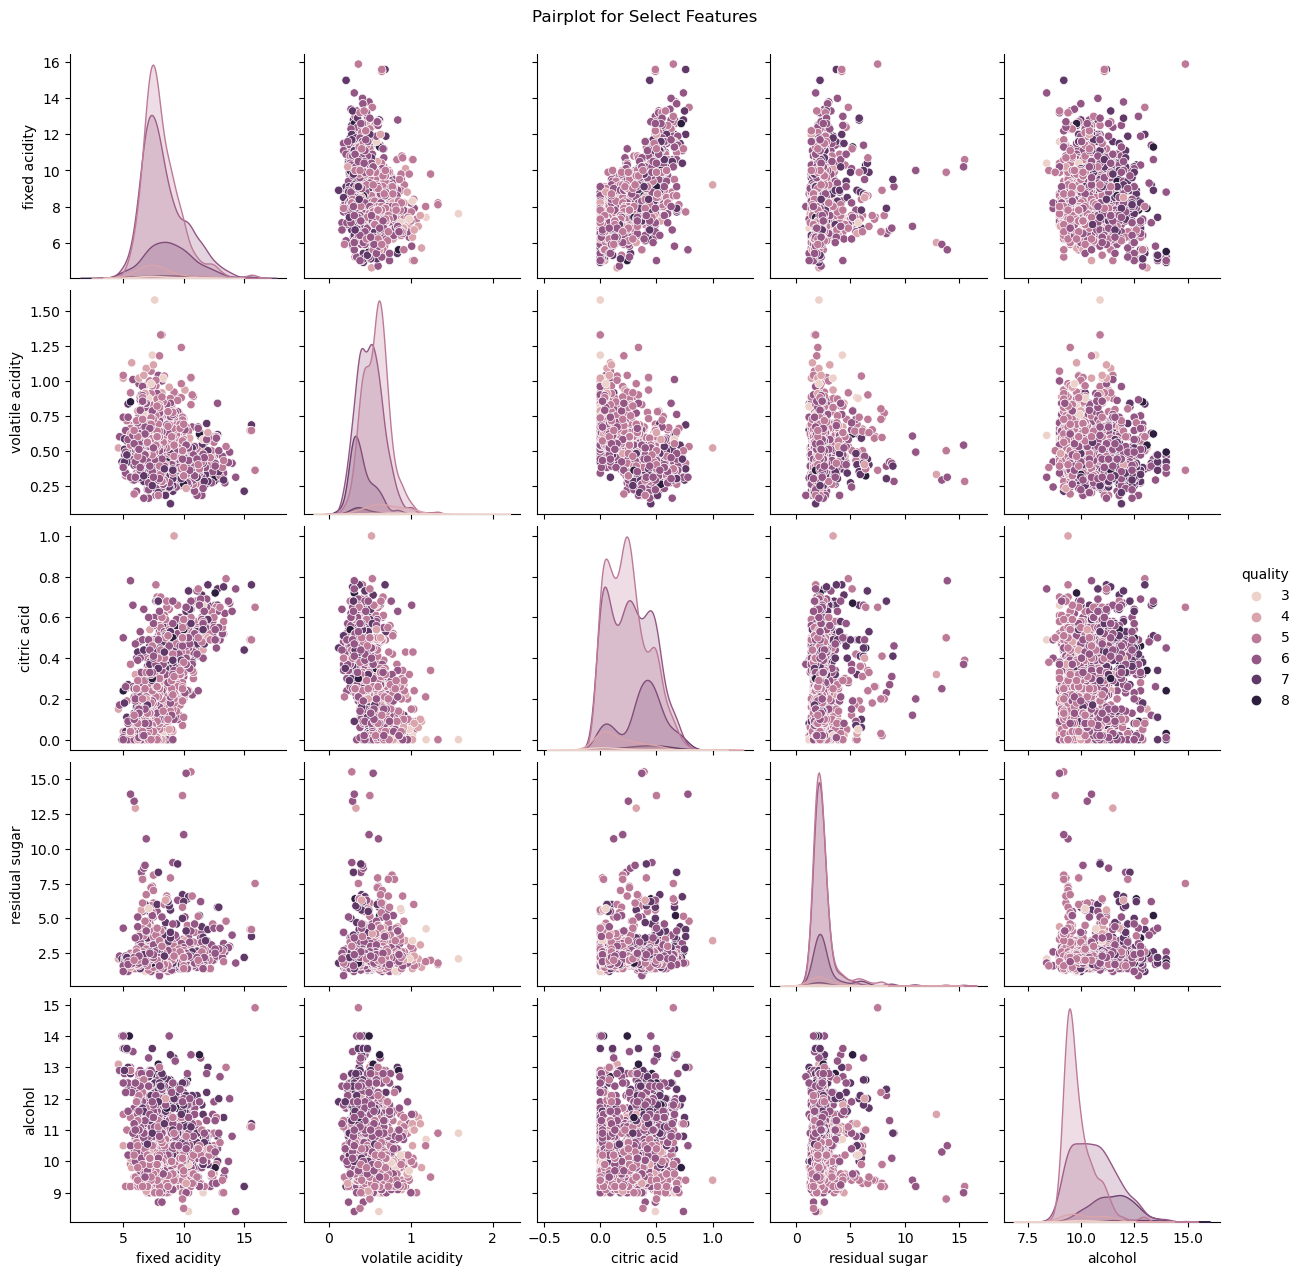

In [18]:
# Pairplot for select features
sns.pairplot(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'quality']], hue='quality', diag_kind='kde')
plt.suptitle('Pairplot for Select Features', y=1.02)
plt.show()


## 7. Correlation Heatmap:

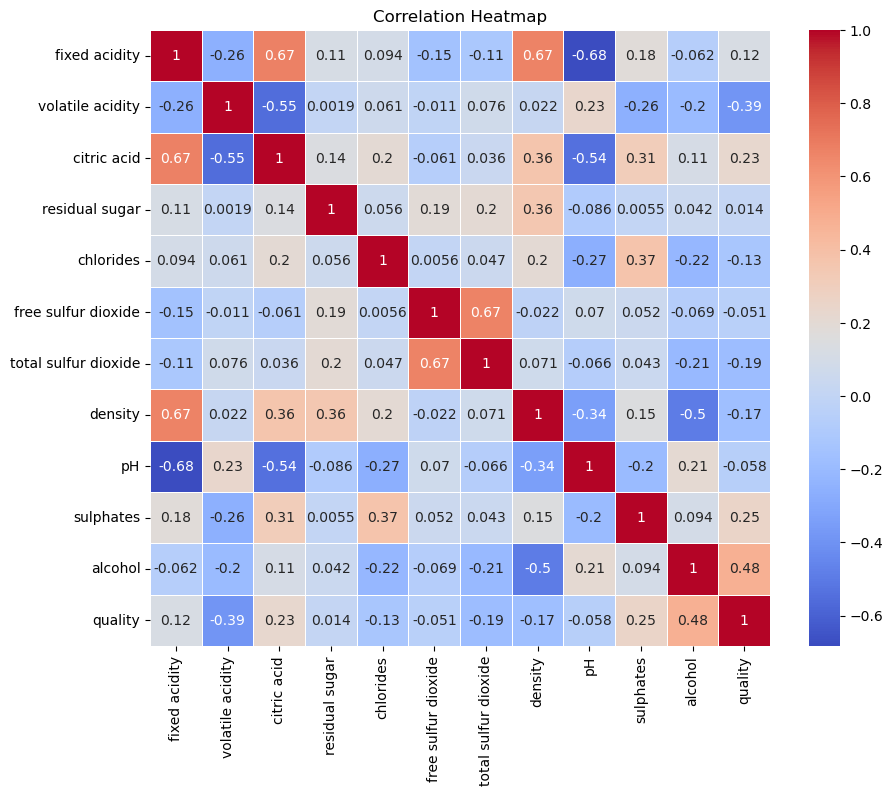

In [19]:
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


## 8. Violin Plot for Density by Quality:

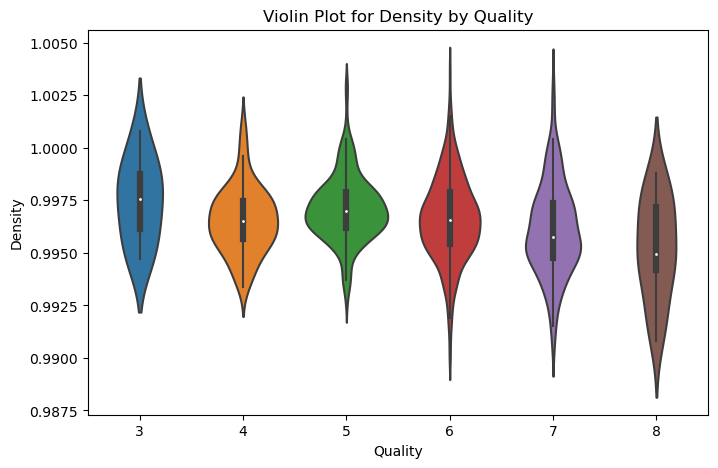

In [20]:
# Violin plot for 'Density' by 'Quality'
plt.figure(figsize=(8, 5))
sns.violinplot(x='quality', y='density', data=data)
plt.title('Violin Plot for Density by Quality')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()


## 9. Barplot for Average Sulphates by Quality:

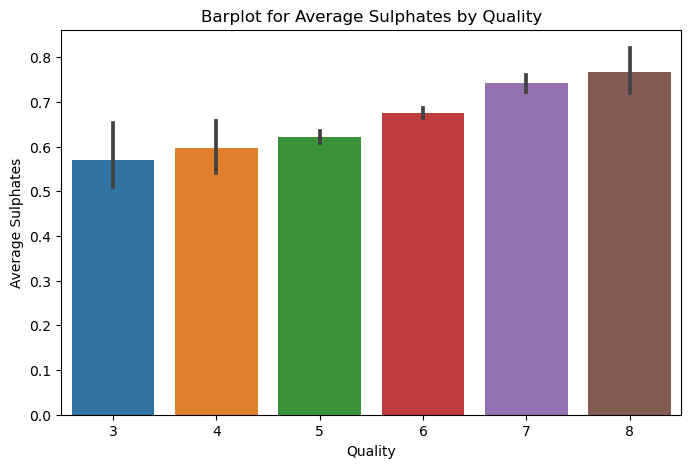

In [21]:
# Barplot for average 'Sulphates' by 'Quality'
plt.figure(figsize=(8, 5))
sns.barplot(x='quality', y='sulphates', data=data, estimator=np.mean)
plt.title('Barplot for Average Sulphates by Quality')
plt.xlabel('Quality')
plt.ylabel('Average Sulphates')
plt.show()


## 10. Boxplot for Free Sulfur Dioxide by Quality:

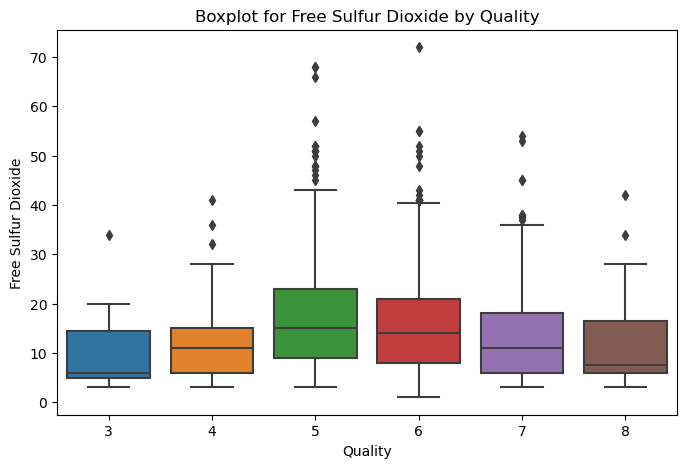

In [22]:
# Boxplot for 'Free Sulfur Dioxide' by 'Quality'
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='free sulfur dioxide', data=data)
plt.title('Boxplot for Free Sulfur Dioxide by Quality')
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide')
plt.show()


# 4. Data Preprocessing

In [25]:
scaler = StandardScaler()

numeric = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

transformer = ColumnTransformer([("num",scaler, numeric)])
x = data.drop("quality" ,axis = 1)

y = data["quality"]

transform = transformer.fit_transform(x)

print("transform shape :",transform.shape)
print("y shape :",y.shape)

transform shape : (1599, 11)
y shape : (1599,)


In [26]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.2 ,random_state = 42)

In [27]:
x_train.shape

(1279, 11)

In [28]:
x_test.shape

(320, 11)

In [29]:
y_train.shape

(1279,)

In [30]:
y_test.shape

(320,)

# 5.  Model Selection and Fine-Tuning or Evaluation

1. **Model Options:**
   - Consider Logistic Regression, Random Forest, and Gradient Boosting.

2. **Data Splitting:**
   - Divide the dataset into training and testing sets (e.g., 80-20 split).

3. **Training:**
   - Train models with default parameters on the training data.

4. **Evaluation:**
   - Use metrics like accuracy, precision, recall, and F1-score for evaluation.
   - Apply cross-validation techniques for robust assessment.

5. **Hyperparameter Tuning:**
   - Fine-tune Random Forest and Gradient Boosting using grid/random search.

6. **Comparison:**
   - Compare models based on evaluation metrics.

7. **Deployment and Monitoring:**
   - Deploy the best-performing model and establish continuous monitoring for accuracy and relevance. Update the model as needed based on changing data patterns.

In [31]:
class_names = [0, 1,2,3,4,5]
print(class_names)


[0, 1, 2, 3, 4, 5]


In [32]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### GradientBoostingClassifier

In [33]:

mnb = GradientBoostingClassifier()
mnb.fit(x_train, y_train)

# Evaluate the model
train_accuracy = mnb.score(x_train, y_train)
test_accuracy = mnb.score(x_test, y_test)

# Print model accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions and display classification report
y_pred = mnb.predict(x_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)




Training Accuracy: 0.89
Test Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.10      0.17        10
           5       0.68      0.73      0.70       130
           6       0.58      0.63      0.60       132
           7       0.52      0.38      0.44        42
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.38      0.31      0.32       320
weighted avg       0.60      0.61      0.60       320



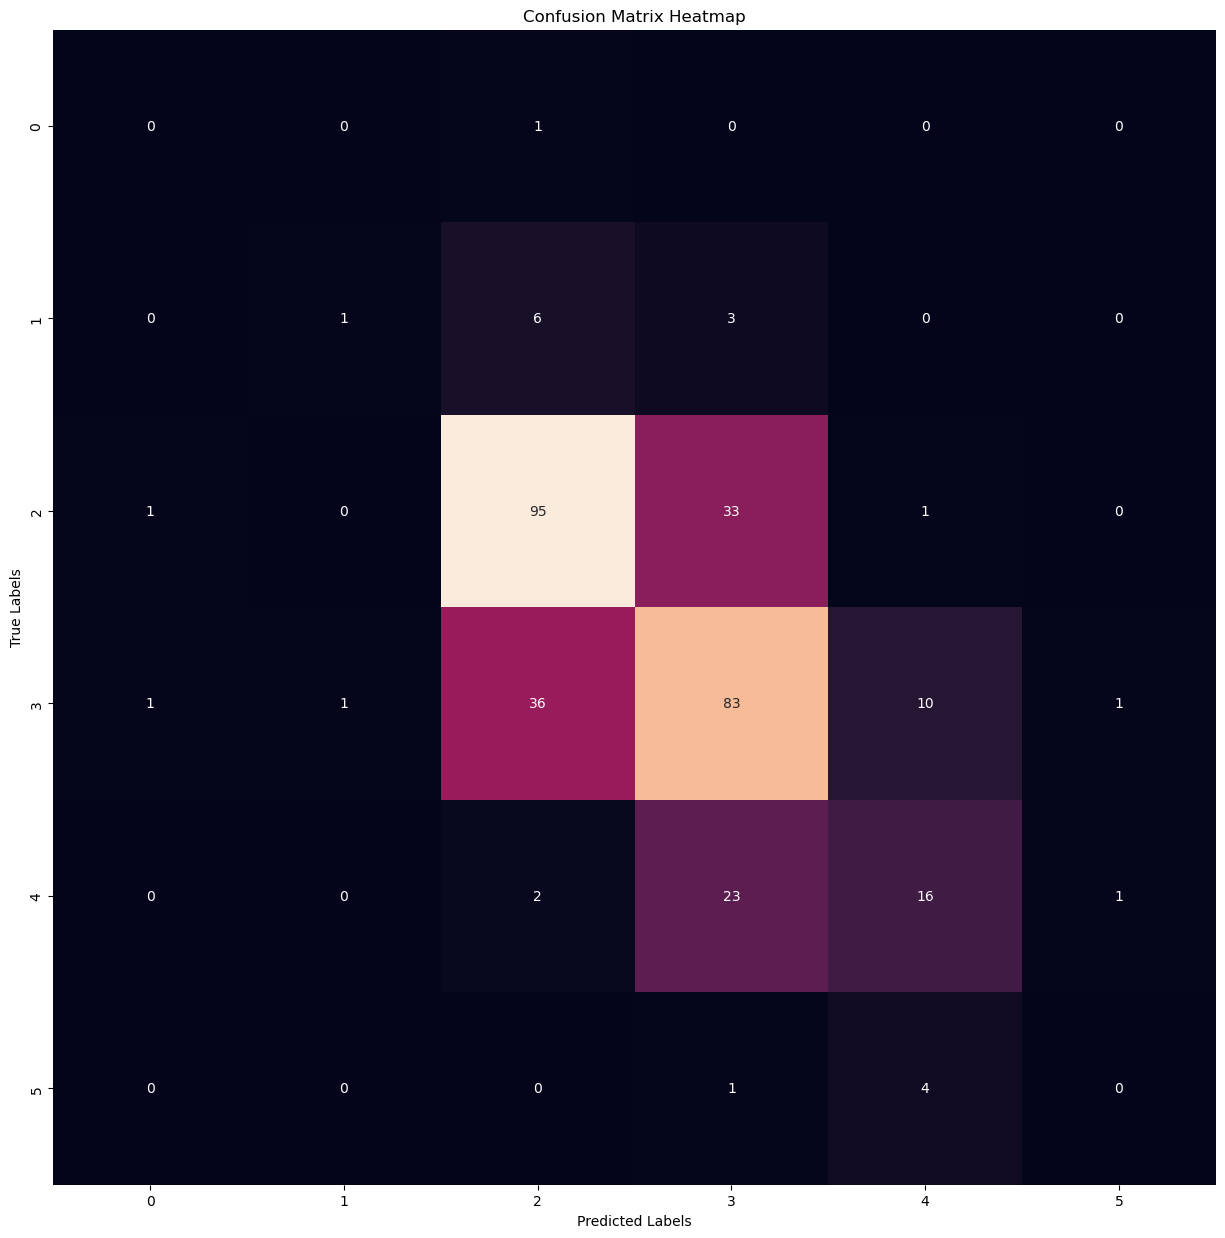

In [34]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### LogisticRegression

In [35]:

model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Testing data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))



Model Score on Training data 0.619233776387803
Model Score on Testing data 0.575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.10      1.00      0.18         1
           5       0.75      0.63      0.69       155
           6       0.58      0.54      0.56       141
           7       0.21      0.39      0.28        23
           8       0.00      0.00      0.00         0

    accuracy                           0.57       320
   macro avg       0.27      0.43      0.28       320
weighted avg       0.63      0.57      0.60       320



E:\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division`

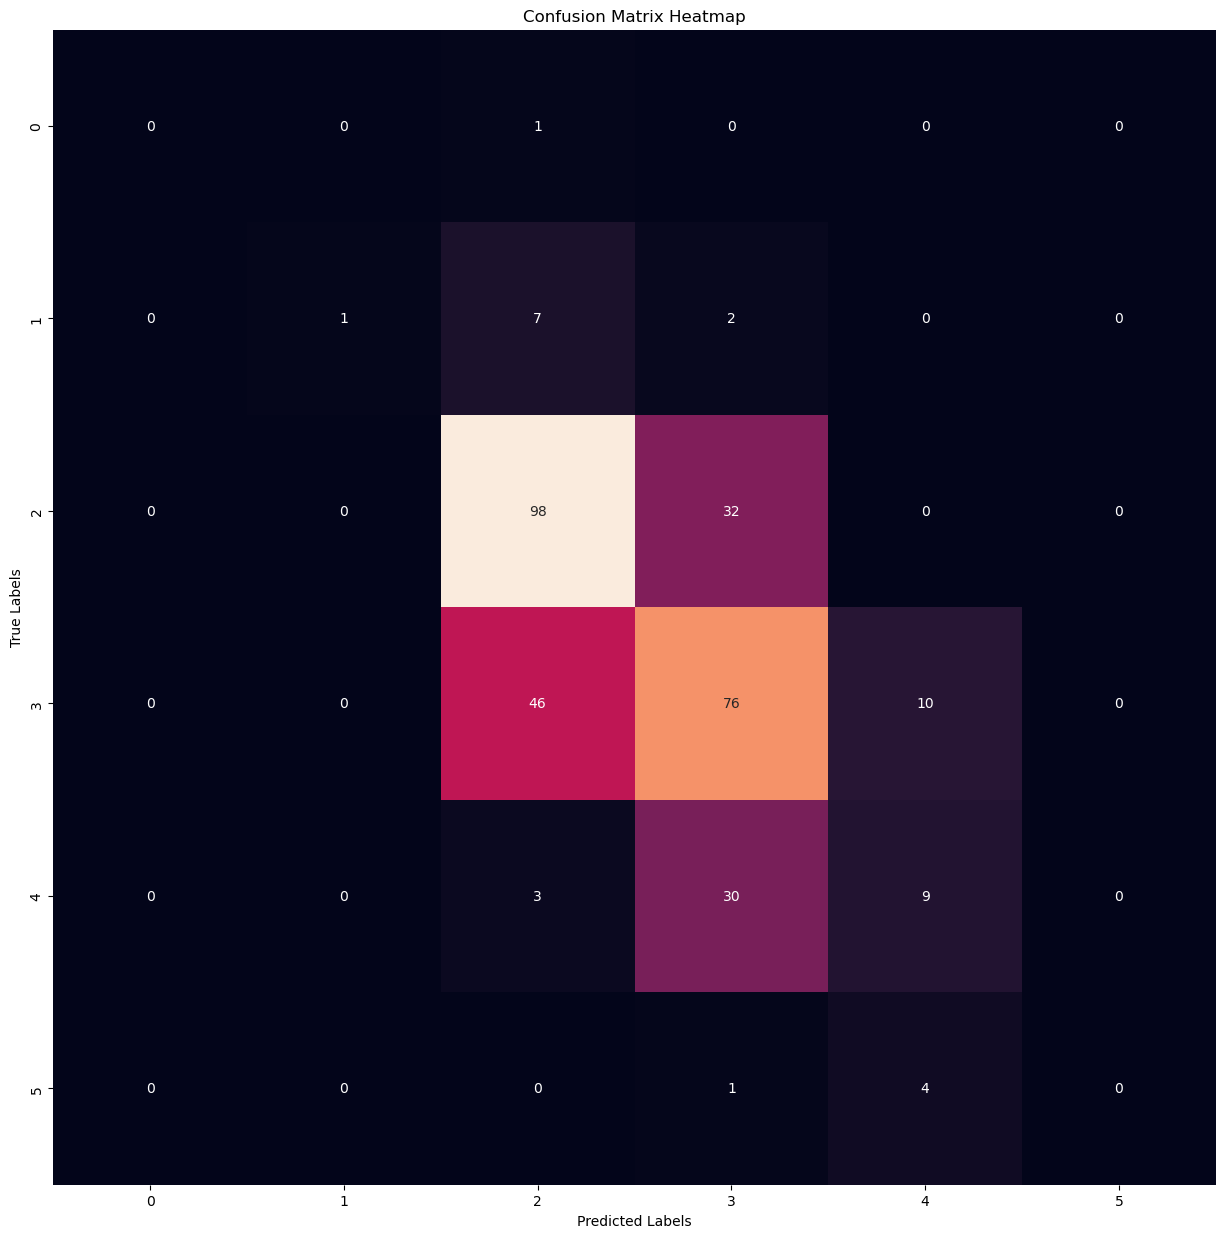

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Support Vector Machine ( SVC )

In [37]:


svm = LinearSVC()
svm.fit(x_train ,y_train)
print("Model Score on Training data",svm.score(x_train ,y_train))
print("Model Score on Testing data",svm.score(x_test ,y_test))
y_pred = svm.predict(x_test)
print(classification_report(y_pred ,y_test))




Model Score on Training data 0.5934323690383112
Model Score on Testing data 0.56875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.79      0.61      0.69       170
           6       0.59      0.53      0.56       147
           7       0.02      0.33      0.04         3
           8       0.00      0.00      0.00         0

    accuracy                           0.57       320
   macro avg       0.23      0.24      0.22       320
weighted avg       0.69      0.57      0.62       320



E:\Anaconda1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

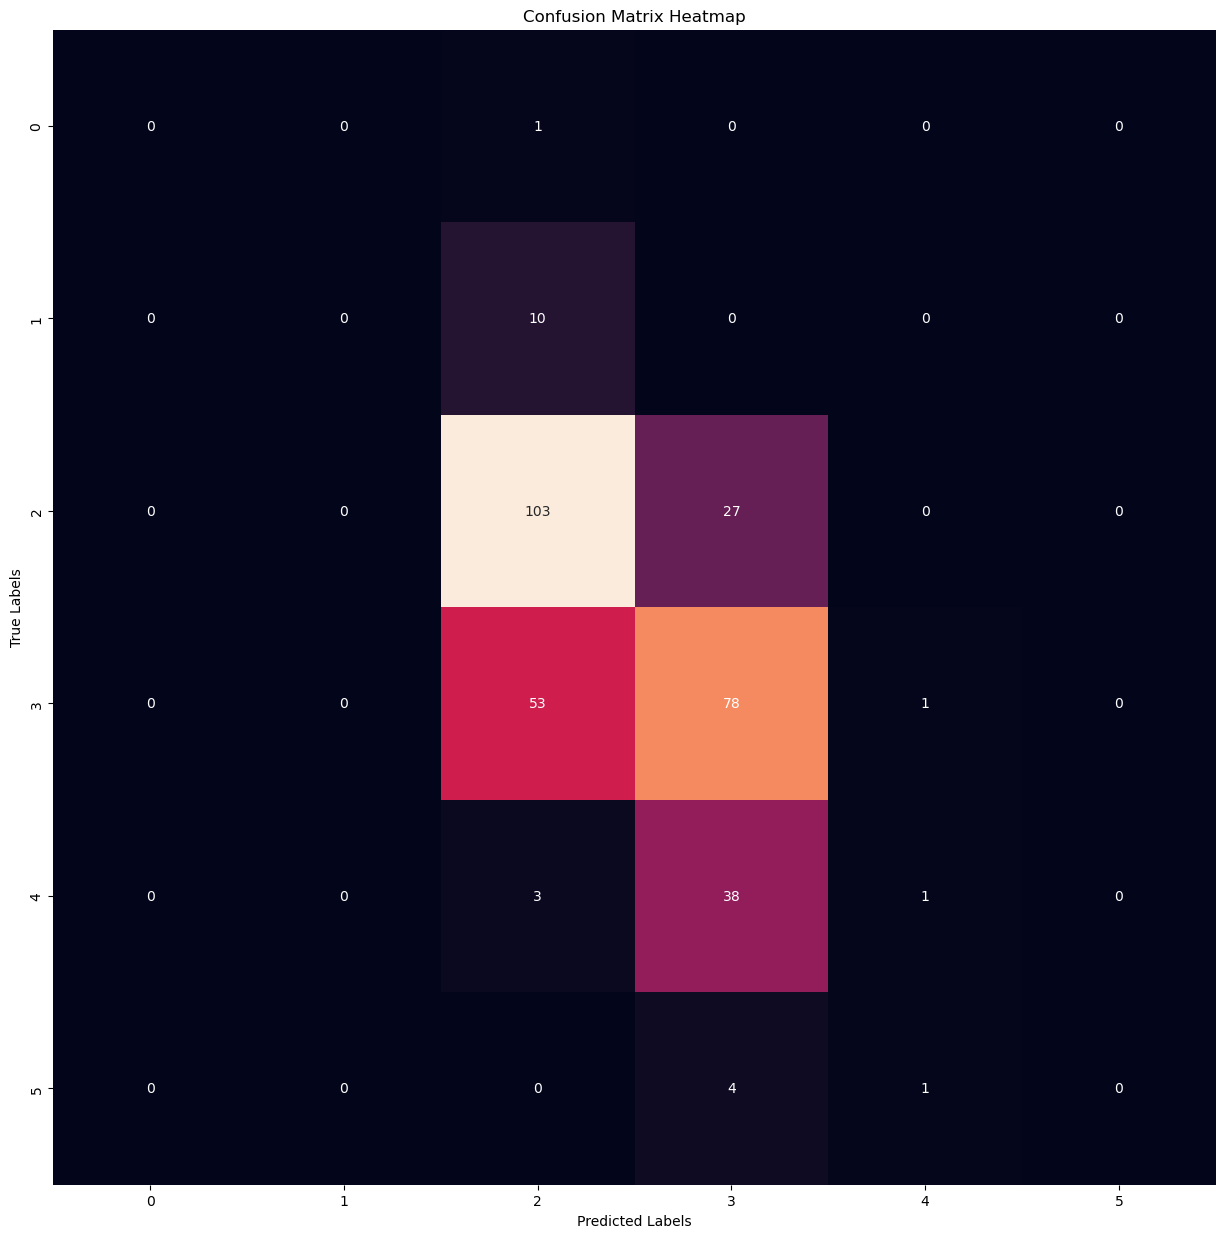

In [38]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### RandomForestClassifier

In [39]:
# Create a Random Forest model
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test, y_test))

y_pred = random_forest.predict(x_test)
print(classification_report(y_pred ,y_test))




Random Forest - Train Score: 1.0
Random Forest - Test Score: 0.678125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.79      0.73      0.76       141
           6       0.72      0.64      0.68       148
           7       0.45      0.63      0.53        30
           8       0.00      0.00      0.00         1

    accuracy                           0.68       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.72      0.68      0.70       320



E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


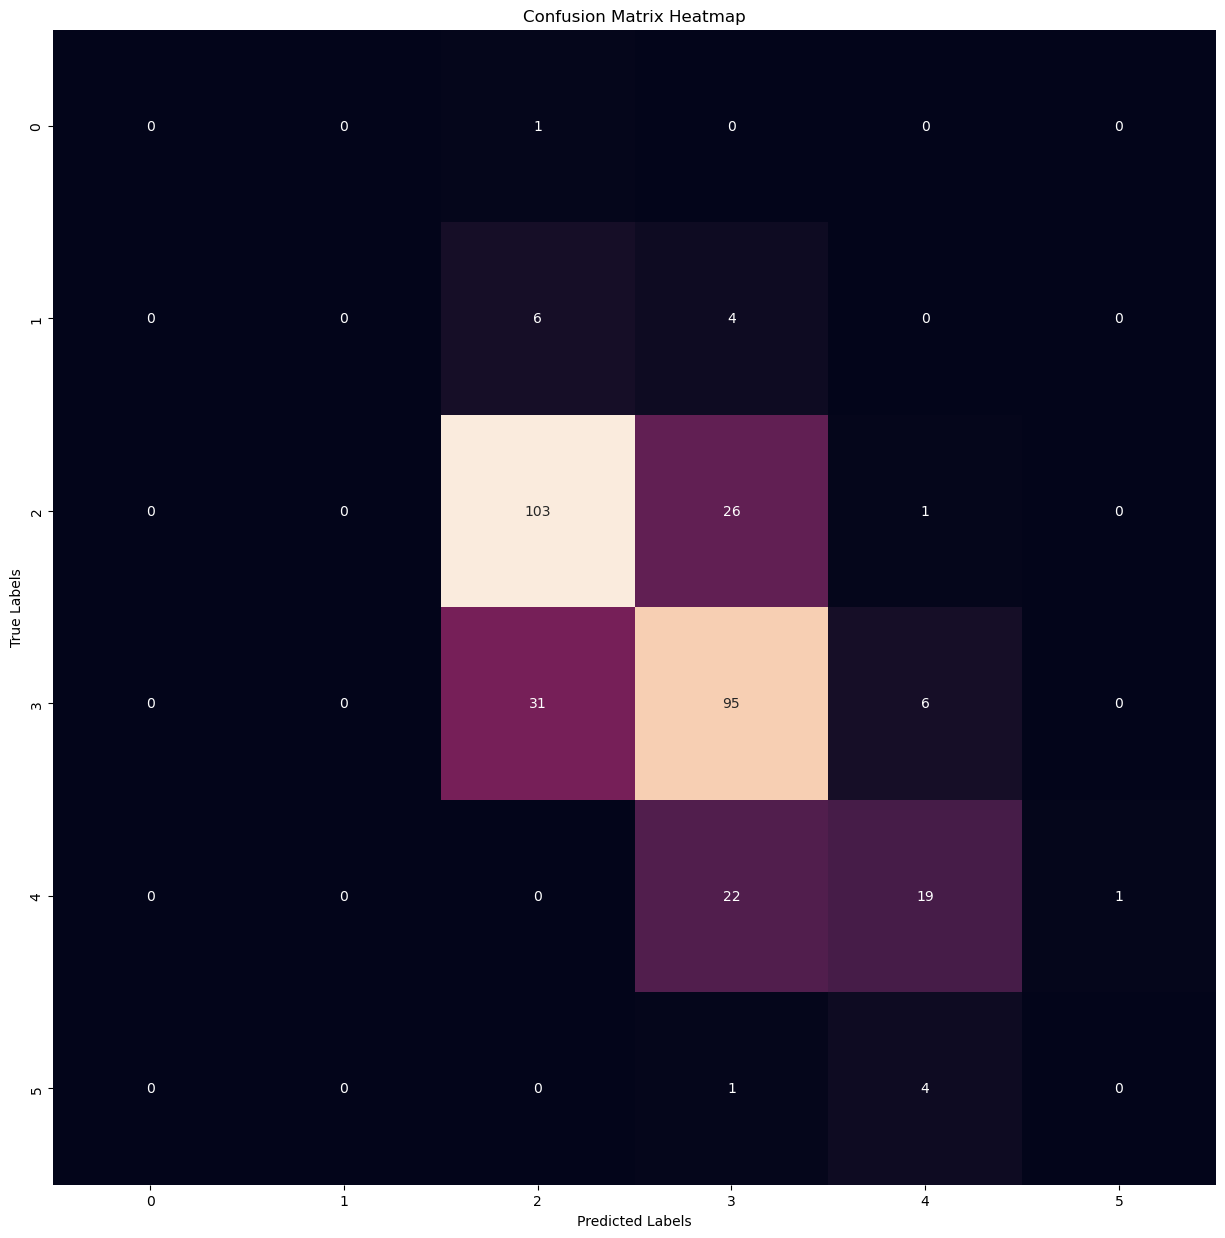

In [40]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Conclusion for Task 5 Models:

- **Gradient Boosting Classifier:**
  - Training Accuracy: 0.89
  - Test Accuracy: 0.61
  - Notable imbalance in precision, recall, and f1-score across different quality classes.

- **Logistic Regression:**
  - Training Accuracy: 0.62
  - Test Accuracy: 0.57
  - Higher precision and recall for class 5, but overall moderate performance.

- **Linear Support Vector Classifier (LinearSVC):**
  - Training Accuracy: 0.59
  - Test Accuracy: 0.57
  - Similar performance to Logistic Regression.

- **Random Forest Classifier:**
  - Training Accuracy: 1.0
  - Test Accuracy: 0.68
  - Balanced performance with relatively higher accuracy.

### Best Model:

Considering the overall performance on the test set, the **Random Forest Classifier** appears to be the best model for Task 5. It achieves a reasonable accuracy and exhibits a balanced precision, recall, and f1-score across different quality classes. The model's ability to handle the complexity of the data and generalize well to unseen samples makes it a suitable choice for wine quality prediction in this scenario.

# Deployment 

In [43]:
# Set a seed for reproducibility
np.random.seed(42)

# Create random data for the wine quality features
num_samples = 10
data = {
    'fixed acidity': np.random.uniform(6.0, 15.0, num_samples),
    'volatile acidity': np.random.uniform(0.2, 1.0, num_samples),
    'citric acid': np.random.uniform(0.0, 0.8, num_samples),
    'residual sugar': np.random.uniform(0.0, 10.0, num_samples),
    'chlorides': np.random.uniform(0.05, 0.2, num_samples),
    'free sulfur dioxide': np.random.uniform(5.0, 40.0, num_samples),
    'total sulfur dioxide': np.random.uniform(20.0, 80.0, num_samples),
    'density': np.random.uniform(0.990, 1.010, num_samples),
    'pH': np.random.uniform(2.8, 3.8, num_samples),
    'sulphates': np.random.uniform(0.3, 1.2, num_samples),
    'alcohol': np.random.uniform(8.0, 14.0, num_samples)
}

# Create a DataFrame
random_df = pd.DataFrame(data)

In [44]:
random_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.370861,0.216468,0.489482,6.075449,0.068306,38.935462,43.320637,1.005445,3.663103,0.407635,8.188575
1,14.556429,0.975928,0.111595,1.705241,0.124277,32.129649,36.280942,0.993974,3.423298,0.941920,11.818462
2,12.587945,0.865954,0.233716,0.650516,0.055158,37.882463,69.724251,0.990110,3.130898,0.984707,9.886136
3,11.387926,0.369871,0.293089,9.488855,0.186398,36.318957,41.405200,1.006309,2.863558,0.805149,11.051424
4,7.404168,0.345460,0.364856,9.656320,0.088817,25.926499,36.856071,1.004137,3.110982,0.993870,13.445399
5,7.403951,0.346724,0.628141,8.083973,0.149378,37.265598,52.561765,1.004580,3.125183,0.744416,9.495753
6,6.522753,0.443394,0.159739,3.046138,0.096757,8.097238,28.455453,1.005425,3.529606,0.770460,10.462298
7,13.795585,0.619805,0.411388,0.976721,0.128010,11.859400,68.131819,0.991481,3.437557,0.684787,12.533307
8,11.410035,0.545556,0.473932,6.842330,0.132007,6.582955,24.473039,0.997169,3.687213,0.322877,9.372789
9,12.372653,0.432983,0.037160,4.401525,0.077728,16.386562,79.213216,0.992317,3.272215,0.397102,8.461879


In [45]:
# Preprocess the random data using the same transformations
random_transform = transformer.transform(random_df)

## GradientBoostingClassifier

In [46]:
# Make predictions on the preprocessed random data
random_predictions = mnb.predict(random_transform)
random_predictions

array([3, 6, 5, 6, 6, 5, 6, 6, 4, 3], dtype=int64)

In [49]:
# Add the predicted species to the random DataFrame
random_df['predicted_quality'] = random_predictions

random_df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol", 'predicted_quality']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted_quality
0,9.370861,0.216468,0.489482,6.075449,0.068306,38.935462,43.320637,1.005445,3.663103,0.407635,8.188575,3
1,14.556429,0.975928,0.111595,1.705241,0.124277,32.129649,36.280942,0.993974,3.423298,0.941920,11.818462,6
2,12.587945,0.865954,0.233716,0.650516,0.055158,37.882463,69.724251,0.990110,3.130898,0.984707,9.886136,5
3,11.387926,0.369871,0.293089,9.488855,0.186398,36.318957,41.405200,1.006309,2.863558,0.805149,11.051424,6
4,7.404168,0.345460,0.364856,9.656320,0.088817,25.926499,36.856071,1.004137,3.110982,0.993870,13.445399,6
5,7.403951,0.346724,0.628141,8.083973,0.149378,37.265598,52.561765,1.004580,3.125183,0.744416,9.495753,5
6,6.522753,0.443394,0.159739,3.046138,0.096757,8.097238,28.455453,1.005425,3.529606,0.770460,10.462298,6
7,13.795585,0.619805,0.411388,0.976721,0.128010,11.859400,68.131819,0.991481,3.437557,0.684787,12.533307,6
8,11.410035,0.545556,0.473932,6.842330,0.132007,6.582955,24.473039,0.997169,3.687213,0.322877,9.372789,4
9,12.372653,0.432983,0.037160,4.401525,0.077728,16.386562,79.213216,0.992317,3.272215,0.397102,8.461879,3


## Logistics Regression

In [50]:
# Make predictions on the preprocessed random data
random_predictions = model.predict(random_transform)
random_predictions

array([5, 7, 4, 6, 7, 5, 6, 7, 4, 4], dtype=int64)

In [51]:
# Add the predicted species to the random DataFrame
random_df['predicted_quality'] = random_predictions

random_df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol", 'predicted_quality']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted_quality
0,9.370861,0.216468,0.489482,6.075449,0.068306,38.935462,43.320637,1.005445,3.663103,0.407635,8.188575,5
1,14.556429,0.975928,0.111595,1.705241,0.124277,32.129649,36.280942,0.993974,3.423298,0.941920,11.818462,7
2,12.587945,0.865954,0.233716,0.650516,0.055158,37.882463,69.724251,0.990110,3.130898,0.984707,9.886136,4
3,11.387926,0.369871,0.293089,9.488855,0.186398,36.318957,41.405200,1.006309,2.863558,0.805149,11.051424,6
4,7.404168,0.345460,0.364856,9.656320,0.088817,25.926499,36.856071,1.004137,3.110982,0.993870,13.445399,7
5,7.403951,0.346724,0.628141,8.083973,0.149378,37.265598,52.561765,1.004580,3.125183,0.744416,9.495753,5
6,6.522753,0.443394,0.159739,3.046138,0.096757,8.097238,28.455453,1.005425,3.529606,0.770460,10.462298,6
7,13.795585,0.619805,0.411388,0.976721,0.128010,11.859400,68.131819,0.991481,3.437557,0.684787,12.533307,7
8,11.410035,0.545556,0.473932,6.842330,0.132007,6.582955,24.473039,0.997169,3.687213,0.322877,9.372789,4
9,12.372653,0.432983,0.037160,4.401525,0.077728,16.386562,79.213216,0.992317,3.272215,0.397102,8.461879,4


## Random Forest Classifier

In [52]:
# Make predictions on the preprocessed random data
random_predictions = random_forest.predict(random_transform)
random_predictions

array([6, 6, 5, 7, 6, 5, 5, 6, 5, 5], dtype=int64)

In [53]:
# Add the predicted species to the random DataFrame
random_df['predicted_quality'] = random_predictions

random_df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol", 'predicted_quality']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted_quality
0,9.370861,0.216468,0.489482,6.075449,0.068306,38.935462,43.320637,1.005445,3.663103,0.407635,8.188575,6
1,14.556429,0.975928,0.111595,1.705241,0.124277,32.129649,36.280942,0.993974,3.423298,0.941920,11.818462,6
2,12.587945,0.865954,0.233716,0.650516,0.055158,37.882463,69.724251,0.990110,3.130898,0.984707,9.886136,5
3,11.387926,0.369871,0.293089,9.488855,0.186398,36.318957,41.405200,1.006309,2.863558,0.805149,11.051424,7
4,7.404168,0.345460,0.364856,9.656320,0.088817,25.926499,36.856071,1.004137,3.110982,0.993870,13.445399,6
5,7.403951,0.346724,0.628141,8.083973,0.149378,37.265598,52.561765,1.004580,3.125183,0.744416,9.495753,5
6,6.522753,0.443394,0.159739,3.046138,0.096757,8.097238,28.455453,1.005425,3.529606,0.770460,10.462298,5
7,13.795585,0.619805,0.411388,0.976721,0.128010,11.859400,68.131819,0.991481,3.437557,0.684787,12.533307,6
8,11.410035,0.545556,0.473932,6.842330,0.132007,6.582955,24.473039,0.997169,3.687213,0.322877,9.372789,5
9,12.372653,0.432983,0.037160,4.401525,0.077728,16.386562,79.213216,0.992317,3.272215,0.397102,8.461879,5


## Thank You! 😊🙌
## We appreciate your time and attention!